# UCI Poker dataset classification with Scikit-learn
**Student Name: Nguyen Minh Khoi**\
**Student ID: 21127081**



The libraries for this kernel are:

• Pandas

• Seaborn

• Matplotlib

• Graphviz

• Scikit-Learn

In [2]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data and merge manually

Load data to Pandas dataframes and save into poker-hand-data.csv

In [4]:
train_data = pd.read_csv('./input/poker-hand-training-true.data', header=None)
test_data = pd.read_csv('./input/poker-hand-testing.data', header=None)

merged_data = pd.concat([train_data, test_data])
merged_file = merged_data.to_csv('./datasets/poker-hand-data.csv', index=False, header=None)

# Preparing the data sets


We need to prepare four subsets from merged data:

• features_train

• features_test

• labels_train

• labels_test

In [5]:
features = merged_data.iloc[:, :-1]
labels = merged_data.iloc[:, -1]

split_ratios = [0.4, 0.6, 0.8, 0.9]

for split_ratio in split_ratios:
    features_train, features_test, labels_train, labels_test = train_test_split(
        features, labels, test_size=1-split_ratio, stratify=labels, shuffle=True, random_state=42)
    
    features_train.to_csv(f'./datasets/features_train_{int(split_ratio*100)}.csv', index=False)
    features_test.to_csv(f'./datasets/features_test_{int(split_ratio*100)}.csv', index=False)
    labels_train.to_csv(f'./datasets/labels_train_{int(split_ratio*100)}.csv', index=False)
    labels_test.to_csv(f'./datasets/labels_test_{int(split_ratio*100)}.csv', index=False)

In [6]:
# Declare class names of Poker Hand
class_names = ['Nothing', 'One pair', 'Two pairs', 'Three of a kind', 'Straight', 'Flush', 'Full house', 'Four of a kind', 'Straight flush', 'Royal flush']

Visualize the distributions of classes in all the data sets with Bar Chart

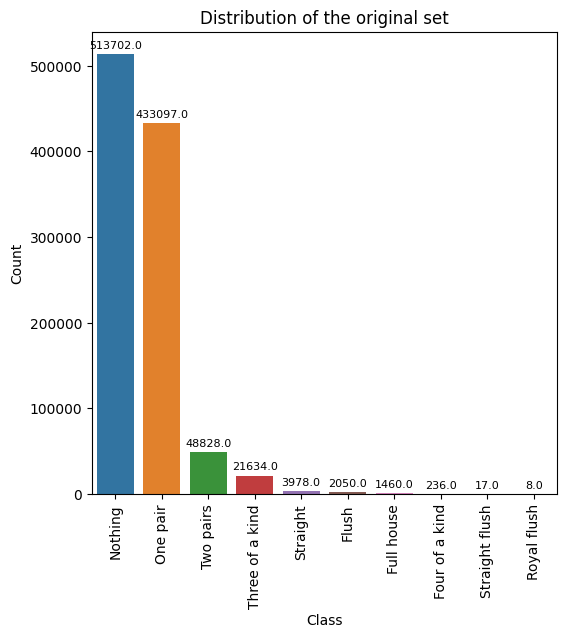

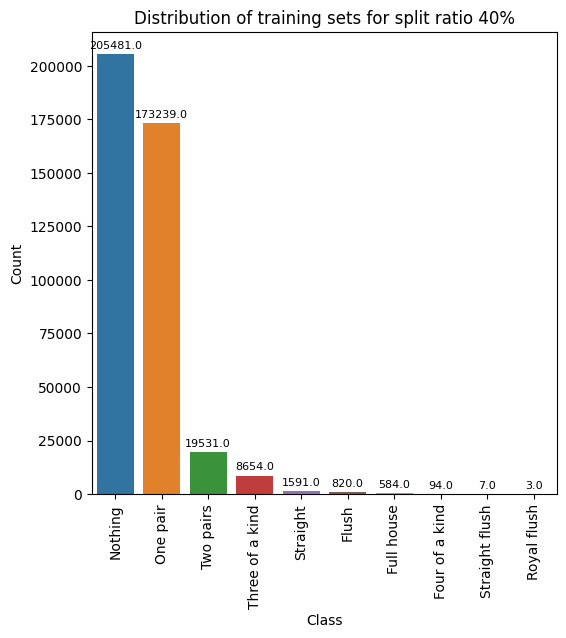

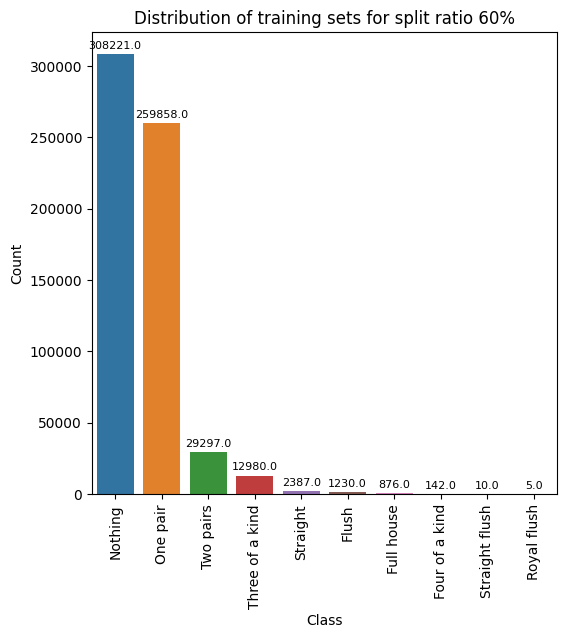

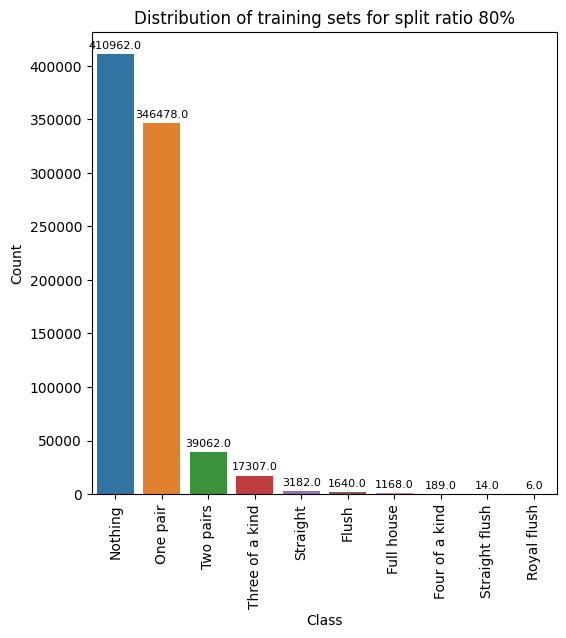

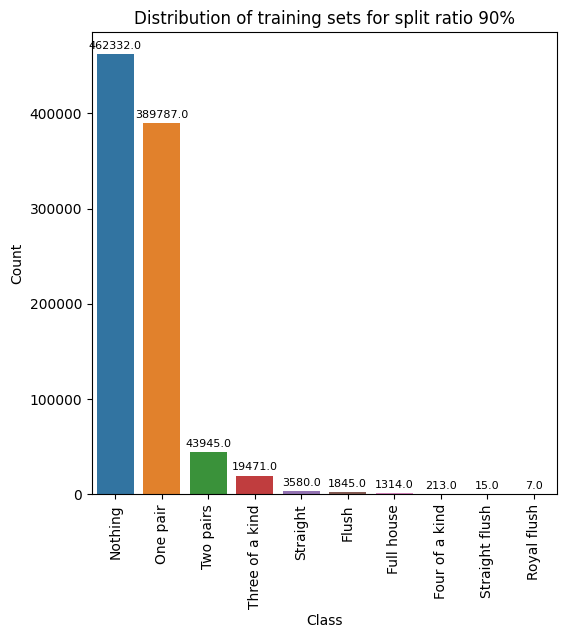

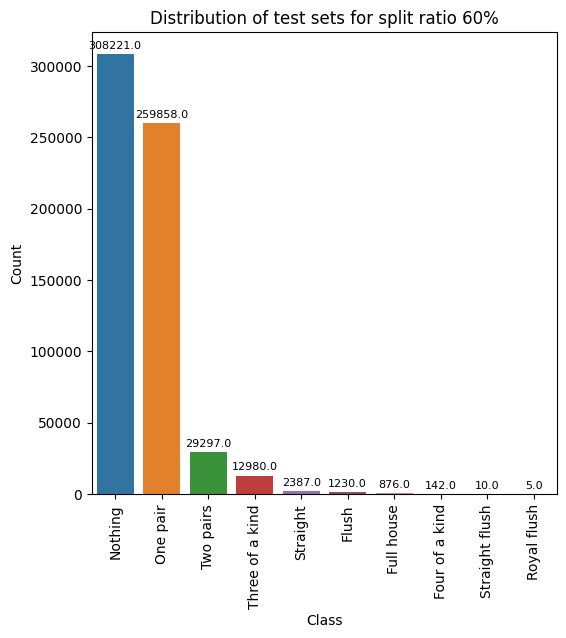

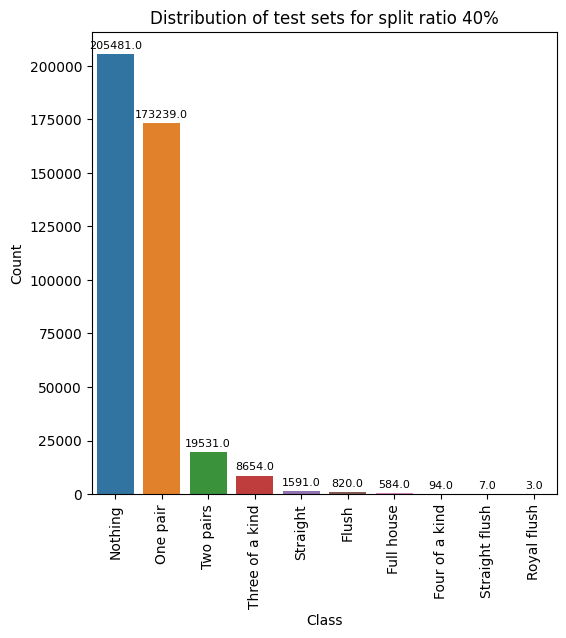

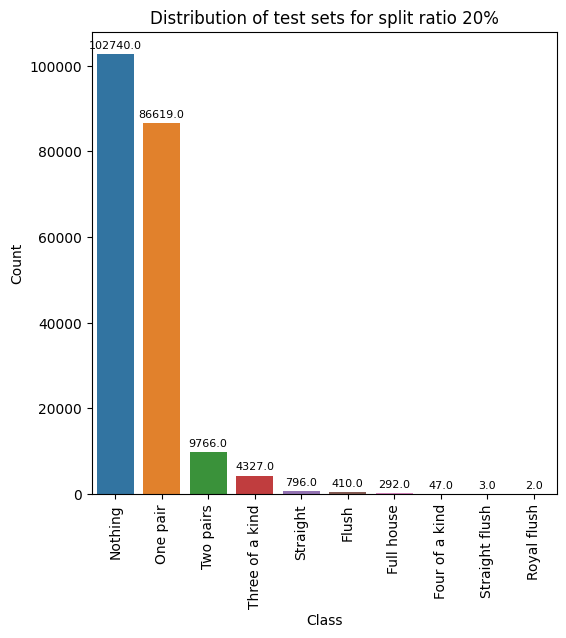

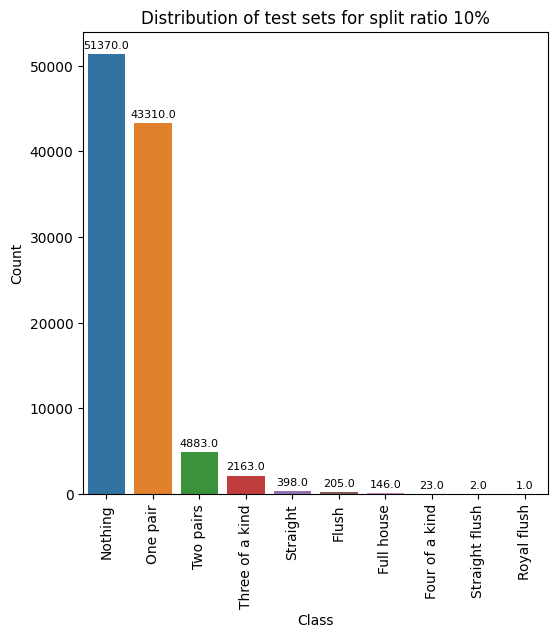

In [10]:
def visualize_barplot(type_set):
    for split_ratio in split_ratios:
        if type_set == "original":
            labels = pd.read_csv(f'./datasets/poker-hand-data.csv', header=None)
            class_counts = labels.iloc[:, -1].value_counts().sort_index()
        else:
            labels = pd.read_csv(f'./datasets/labels_{type_set}_{int(split_ratio*100)}.csv', header=None)
            class_counts = labels[0].value_counts().sort_index()
        
        class_counts = class_counts.reindex(range(10), fill_value=0)
        for i in range(len(class_counts)):
            class_counts = class_counts.rename({i: class_names[i]})

        df = pd.DataFrame(class_counts, class_names)
        plt.figure(figsize=(6, 6))
        plots = sns.barplot(x=class_names, y=class_counts, data=df)

        for bar in plots.patches:
            plots.annotate(format(float(bar.get_height()), '.1f'), (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center', size=8, xytext=(0, 6), textcoords='offset points')
        
        if type_set == "original":
            plt.title(f'Distribution of the original set')
        elif type_set == "train": 
            plt.title(f'Distribution of training sets for split ratio {round(split_ratio*100)}%')
        else:
            plt.title(f'Distribution of test sets for split ratio {round((1- split_ratio)*100)}%')

        plt.xticks(range(len(class_counts)), class_names, rotation=90)
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.show()

        if type_set == "original":
            return

visualize_barplot("original")
visualize_barplot("train")
visualize_barplot("test")

# Building the decision tree classifiers

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

Classification criteria: Entropy

We use graphviz to render decision tree into pdf file.

In [11]:
for ratio in split_ratios:
    features_train = pd.read_csv(f'./datasets/features_train_{int(ratio*100)}.csv', header=None)
    labels_train = pd.read_csv(f'./datasets/labels_train_{int(ratio*100)}.csv', header=None)
    dtc = DecisionTreeClassifier(criterion='entropy')
    dtc.fit(features_train, labels_train)

    depth = 5
    dot_data = export_graphviz(dtc, max_depth=depth, feature_names=class_names, rounded=True, out_file=None, filled=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(directory="decision-tree-graph", filename=f"graph_{int(ratio*100)}")
    

# Evaluating the decision tree classifiers

Classification Report: A classification report is a summary of the performance of a classification model.

Confusion Matrix: A confusion matrix is a table that is used to evaluate the performance of a classification model.

To visualize the Confustion Matrix, we use heatmap. Heatmaps use color-coding to represent the values in the matrix, making it easier to interpret the results of the classification model.

Classification report for 0.4
              precision    recall  f1-score   support

           0       0.71      0.70      0.70    308221
           1       0.58      0.58      0.58    259858
           2       0.25      0.27      0.26     29297
           3       0.30      0.33      0.31     12980
           4       0.22      0.25      0.23      2387
           5       0.06      0.09      0.07      1230
           6       0.11      0.15      0.13       876
           7       0.05      0.06      0.06       142
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         5

    accuracy                           0.62    615006
   macro avg       0.23      0.24      0.23    615006
weighted avg       0.62      0.62      0.62    615006



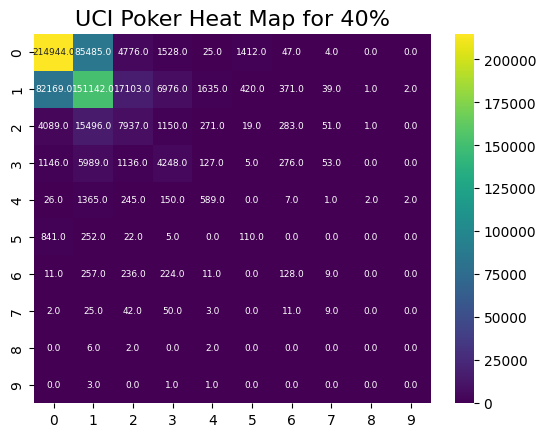

Classification report for 0.6
              precision    recall  f1-score   support

           0       0.72      0.72      0.72    205481
           1       0.60      0.59      0.60    173239
           2       0.27      0.30      0.28     19531
           3       0.30      0.32      0.31      8654
           4       0.24      0.26      0.25      1591
           5       0.05      0.08      0.06       820
           6       0.10      0.12      0.11       584
           7       0.07      0.11      0.09        94
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3

    accuracy                           0.63    410004
   macro avg       0.24      0.25      0.24    410004
weighted avg       0.64      0.63      0.63    410004



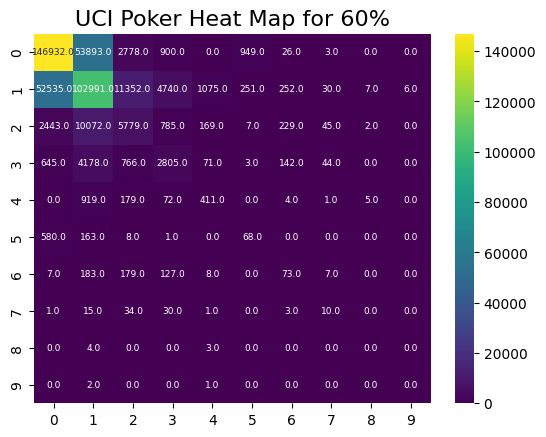

Classification report for 0.8
              precision    recall  f1-score   support

           0       0.73      0.72      0.72    102740
           1       0.60      0.60      0.60     86619
           2       0.30      0.31      0.30      9766
           3       0.34      0.37      0.36      4327
           4       0.28      0.30      0.29       796
           5       0.07      0.11      0.08       410
           6       0.11      0.12      0.11       292
           7       0.22      0.32      0.26        47
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.64    205002
   macro avg       0.26      0.29      0.27    205002
weighted avg       0.64      0.64      0.64    205002



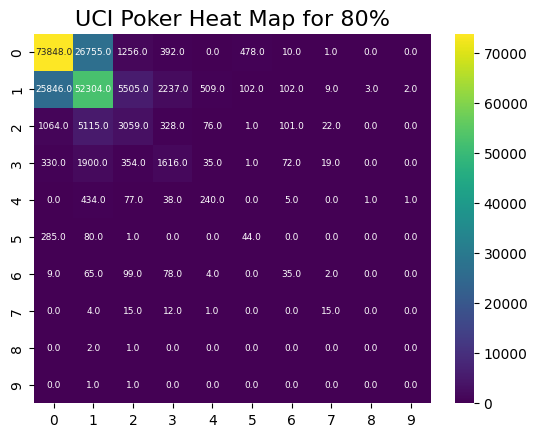

Classification report for 0.9
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     51370
           1       0.61      0.61      0.61     43310
           2       0.30      0.32      0.31      4883
           3       0.33      0.37      0.35      2163
           4       0.28      0.30      0.29       398
           5       0.11      0.14      0.12       205
           6       0.15      0.18      0.16       146
           7       0.19      0.26      0.22        23
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.64    102501
   macro avg       0.27      0.29      0.28    102501
weighted avg       0.65      0.64      0.65    102501



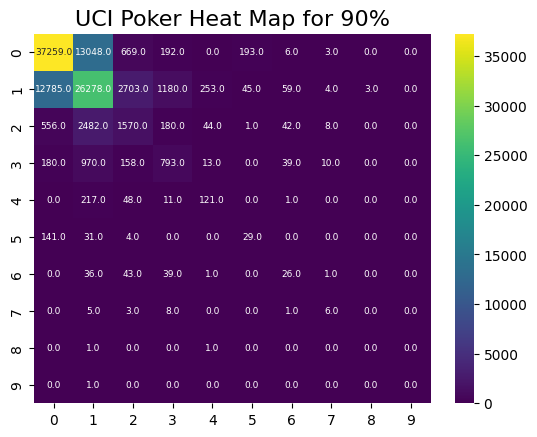

In [12]:
for ratio in split_ratios:
    features_train = pd.read_csv(f'./datasets/features_train_{int(ratio*100)}.csv', header=None)
    labels_train = pd.read_csv(f'./datasets/labels_train_{int(ratio*100)}.csv', header=None)
    features_test = pd.read_csv(f'./datasets/features_test_{int(ratio*100)}.csv', header=None)
    labels_test = pd.read_csv(f'./datasets/labels_test_{int(ratio*100)}.csv', header=None)
    dtc = DecisionTreeClassifier(criterion='entropy')
    dtc.fit(features_train[1:], labels_train[1:])
    labels_pred_dtc = dtc.predict(features_test[1:])
    print(f"Classification report for {ratio}")
    print(classification_report(labels_test[1:], labels_pred_dtc, zero_division=0))
    confusion_matrix(labels_test[1:], labels_pred_dtc)
    table = pd.DataFrame(confusion_matrix(labels_test[1:], labels_pred_dtc))
    plt.title(f"UCI Poker Heat Map for {round(ratio*100)}%",fontsize=16)
    sns.heatmap(table, annot=True, fmt='.1f', cmap='viridis', annot_kws={'size': 6.5})
    plt.show()

# The depth and accuracy of a decision tree

In [14]:
test_ratio = 0.8
features_train = pd.read_csv(f'./datasets/features_train_{int(test_ratio*100)}.csv', header=None)
labels_train = pd.read_csv(f'./datasets/labels_train_{int(test_ratio*100)}.csv', header=None)
features_test = pd.read_csv(f'./datasets/features_test_{int(test_ratio*100)}.csv', header=None)
labels_test = pd.read_csv(f'./datasets/labels_test_{int(test_ratio*100)}.csv', header=None)
list_depths = [None, 2, 3, 4, 5, 6, 7]
for depth in list_depths:
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dtc.fit(features_train[1:], labels_train[1:])
    if depth == None:
        visual_depth = 5
    else:
        visual_depth = None
    dot_data = export_graphviz(dtc, max_depth=visual_depth, feature_names=class_names, rounded=True, out_file=None, filled=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(directory="decision-tree-graph", filename=f"graph_{int(ratio*100)}_{depth}")
    labels_pred_dtc = dtc.predict(features_test[1:])
    print(f"Accuracy score for {test_ratio} in depth {depth}: ")
    print(accuracy_score(labels_test[1:], labels_pred_dtc))

Accuracy score for 0.8 in depth None: 
0.6405937503048751
Accuracy score for 0.8 in depth 2: 
0.5061462814996927
Accuracy score for 0.8 in depth 3: 
0.508965766187647
Accuracy score for 0.8 in depth 4: 
0.5249656100916089
Accuracy score for 0.8 in depth 5: 
0.556384815757895
Accuracy score for 0.8 in depth 6: 
0.556384815757895
Accuracy score for 0.8 in depth 7: 
0.5568774938781085
